Text(0.5, 1.0, '테스트')

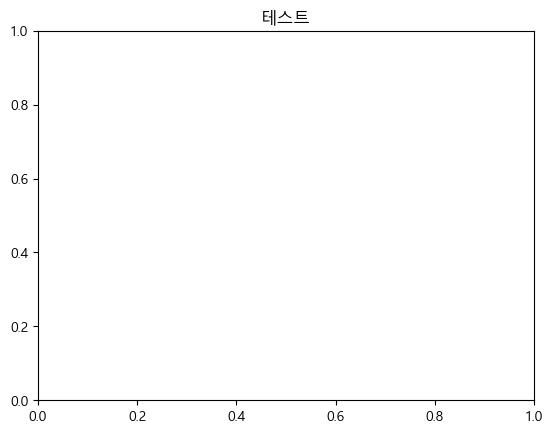

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from pyvis.network import Network
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns

from matplotlib import rc
%matplotlib inline
from matplotlib import font_manager
plt.style.use('default')
f_path = "C:/windows/Fonts/malgun.ttf"
ko_font = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family='Malgun Gothic')
plt.title('테스트')

In [2]:
# Data Load
#ov_sec = pd.read_csv('./ov_sec_180.csv', index_col = 0)
#ov_price = pd.read_csv('./ov_price_180.csv', index_col = 0)
#ov_earn = pd.read_csv('./ov_earning_180.csv', index_col = 0)

ov_sec = pd.read_csv('C:/Users/Administrator/Desktop/비어플_NH/1028/ov_sec_180.csv', index_col = 0)
ov_price = pd.read_csv('C:/Users/Administrator/Desktop/비어플_NH/1028/ov_price_180.csv', index_col = 0)
ov_earn = pd.read_csv('C:/Users/Administrator/Desktop/비어플_NH/1028/ov_earning_180.csv', index_col = 0)

In [3]:
ov_price_Jan = ov_price.loc['2023-01-03':'2023-01-31',:]
ov_price_Feb = ov_price.loc['2023-02-01':'2023-02-28',:]
ov_price_Mar = ov_price.loc['2023-03-01':'2023-03-31',:]
ov_price_Apr = ov_price.loc['2023-04-01':'2023-04-30',:]
ov_price_May = ov_price.loc['2023-05-01':'2023-05-31',:]
ov_price_Jun = ov_price.loc['2023-06-01':'2023-06-30',:]
ov_price_Jul = ov_price.loc['2023-07-01':'2023-07-31',:]
ov_price_Aug = ov_price.loc['2023-08-01':'2023-08-30',:]

# 네트워크 생성

In [4]:
def generate_network(df):
    #상관행렬 생성
    stock_per = df.pct_change()
    stock_per = stock_per.iloc[1:,:]
    stock_cor = stock_per.dropna(axis = 1).corr(method = 'pearson')

    # convert matrix to list of edges and rename the columns
    edges = stock_cor.stack().reset_index()
    edges.columns = ["종목_1", "종목_2", "correlation"]

    # remove self correlations
    edges = edges.loc[edges["종목_1"] != edges["종목_2"]].copy()

    # 임계값(+-0.4) 이하 제거
    threshold = 0.4

    # 기본 무방향 그래프 생성
    Gx = nx.from_pandas_edgelist(edges, "종목_1", "종목_2", edge_attr=["correlation"])

    # list to store edges to remove
    remove = []
    # loop through edges in Gx and find correlations which are below the threshold
    for 종목_1, 종목_2 in Gx.edges():
        corr = Gx[종목_1][종목_2]["correlation"]
        # add to remove node list if abs(corr) < threshold
        if abs(corr) < threshold:
            remove.append((종목_1, 종목_2))

    # remove edges contained in the remove list
    Gx.remove_edges_from(remove)
    print(str(len(remove)) + " edges removed")
    return Gx

In [5]:
Gx_Jan = generate_network(ov_price_Jan)
Gx_Feb = generate_network(ov_price_Feb)
Gx_Mar = generate_network(ov_price_Mar)
Gx_Apr = generate_network(ov_price_Apr)
Gx_May = generate_network(ov_price_May)
Gx_Jun = generate_network(ov_price_Jun)
Gx_Jul = generate_network(ov_price_Jul)
Gx_Aug = generate_network(ov_price_Aug)

10363 edges removed
10625 edges removed
8575 edges removed
11112 edges removed
12321 edges removed
12564 edges removed
13446 edges removed
12212 edges removed


# degree 월 별 중요도 데이터 생성

In [6]:
# 1월
degree_dict_Jan = nx.degree_centrality(Gx_Jan)
degree_df_Jan = pd.DataFrame.from_dict(degree_dict_Jan, orient = 'index', columns = ['centrality'])
degree_df_Jan.reset_index(inplace=True)
degree_df_Jan.columns = ['종목명','centrality']

degree_Jan = pd.merge(degree_df_Jan, ov_sec, how = 'left', on = '종목명')

degree_Jan_mean = degree_Jan.loc[:,['sector','centrality']].groupby('sector').mean()
degree_Jan_mean.reset_index(inplace=True)
degree_Jan_mean.columns = ['sector','centrality']
degree_Jan_mean['Month'] = 1

# 2월
degree_dict_Feb = nx.degree_centrality(Gx_Feb)
degree_df_Feb = pd.DataFrame.from_dict(degree_dict_Feb, orient = 'index', columns = ['centrality'])
degree_df_Feb.reset_index(inplace=True)
degree_df_Feb.columns = ['종목명','centrality']

degree_Feb = pd.merge(degree_df_Feb, ov_sec, how = 'left', on = '종목명')

degree_Feb_mean = degree_Feb.loc[:,['sector','centrality']].groupby('sector').mean()
degree_Feb_mean.reset_index(inplace=True)
degree_Feb_mean.columns = ['sector','centrality']
degree_Feb_mean['Month'] = 2

# 3월
degree_dict_Mar = nx.degree_centrality(Gx_Mar)
degree_df_Mar = pd.DataFrame.from_dict(degree_dict_Mar, orient = 'index', columns = ['centrality'])
degree_df_Mar.reset_index(inplace=True)
degree_df_Mar.columns = ['종목명','centrality']

degree_Mar = pd.merge(degree_df_Mar, ov_sec, how = 'left', on = '종목명')

degree_Mar_mean = degree_Mar.loc[:,['sector','centrality']].groupby('sector').mean()
degree_Mar_mean.reset_index(inplace=True)
degree_Mar_mean.columns = ['sector','centrality']
degree_Mar_mean['Month'] = 3

# 4월
degree_dict_Apr = nx.degree_centrality(Gx_Apr)
degree_df_Apr = pd.DataFrame.from_dict(degree_dict_Apr, orient = 'index', columns = ['centrality'])
degree_df_Apr.reset_index(inplace=True)
degree_df_Apr.columns = ['종목명','centrality']

degree_Apr = pd.merge(degree_df_Apr, ov_sec, how = 'left', on = '종목명')

degree_Apr_mean = degree_Apr.loc[:,['sector','centrality']].groupby('sector').mean()
degree_Apr_mean.reset_index(inplace=True)
degree_Apr_mean.columns = ['sector','centrality']
degree_Apr_mean['Month'] = 4

# 5월
degree_dict_May = nx.degree_centrality(Gx_May)
degree_df_May = pd.DataFrame.from_dict(degree_dict_May, orient = 'index', columns = ['centrality'])
degree_df_May.reset_index(inplace=True)
degree_df_May.columns = ['종목명','centrality']

degree_May = pd.merge(degree_df_May, ov_sec, how = 'left', on = '종목명')

degree_May_mean = degree_May.loc[:,['sector','centrality']].groupby('sector').mean()
degree_May_mean.reset_index(inplace=True)
degree_May_mean.columns = ['sector','centrality']
degree_May_mean['Month'] = 5

# 6월
degree_dict_Jun = nx.degree_centrality(Gx_Jun)
degree_df_Jun = pd.DataFrame.from_dict(degree_dict_Jun, orient = 'index', columns = ['centrality'])
degree_df_Jun.reset_index(inplace=True)
degree_df_Jun.columns = ['종목명','centrality']

degree_Jun = pd.merge(degree_df_Jun, ov_sec, how = 'left', on = '종목명')

degree_Jun_mean = degree_Jun.loc[:,['sector','centrality']].groupby('sector').mean()
degree_Jun_mean.reset_index(inplace=True)
degree_Jun_mean.columns = ['sector','centrality']
degree_Jun_mean['Month'] = 6

# 7월
degree_dict_Jul = nx.degree_centrality(Gx_Jul)
degree_df_Jul = pd.DataFrame.from_dict(degree_dict_Jul, orient = 'index', columns = ['centrality'])
degree_df_Jul.reset_index(inplace=True)
degree_df_Jul.columns = ['종목명','centrality']

degree_Jul = pd.merge(degree_df_Jul, ov_sec, how = 'left', on = '종목명')

degree_Jul_mean = degree_Jul.loc[:,['sector','centrality']].groupby('sector').mean()
degree_Jul_mean.reset_index(inplace=True)
degree_Jul_mean.columns = ['sector','centrality']
degree_Jul_mean['Month'] = 7

# 8월
degree_dict_Aug = nx.degree_centrality(Gx_Aug)
degree_df_Aug = pd.DataFrame.from_dict(degree_dict_Aug, orient = 'index', columns = ['centrality'])
degree_df_Aug.reset_index(inplace=True)
degree_df_Aug.columns = ['종목명','centrality']

degree_Aug = pd.merge(degree_df_Aug, ov_sec, how = 'left', on = '종목명')

degree_Aug_mean = degree_Aug.loc[:,['sector','centrality']].groupby('sector').mean()
degree_Aug_mean.reset_index(inplace=True)
degree_Aug_mean.columns = ['sector','centrality']
degree_Aug_mean['Month'] = 8

In [7]:
degree_mean = pd.merge(degree_Jan_mean, degree_Feb_mean, how = 'outer', on = ['sector','Month','centrality'])
degree_mean = pd.merge(degree_mean, degree_Mar_mean, how = 'outer', on = ['sector','Month','centrality'])
degree_mean = pd.merge(degree_mean, degree_Apr_mean, how = 'outer', on = ['sector','Month','centrality'])
degree_mean = pd.merge(degree_mean, degree_May_mean, how = 'outer', on = ['sector','Month','centrality'])
degree_mean = pd.merge(degree_mean, degree_Jun_mean, how = 'outer', on = ['sector','Month','centrality'])
degree_mean = pd.merge(degree_mean, degree_Jul_mean, how = 'outer', on = ['sector','Month','centrality'])
degree_mean = pd.merge(degree_mean, degree_Aug_mean, how = 'outer', on = ['sector','Month','centrality'])

# closeness 월 별 중요도 데이터 생성

In [8]:
# 1월
close_dict_Jan = nx.closeness_centrality(Gx_Jan)
close_df_Jan = pd.DataFrame.from_dict(close_dict_Jan, orient = 'index', columns = ['centrality'])
close_df_Jan.reset_index(inplace=True)
close_df_Jan.columns = ['종목명','centrality']

close_Jan = pd.merge(close_df_Jan, ov_sec, how = 'left', on = '종목명')

close_Jan_mean = close_Jan.loc[:,['sector','centrality']].groupby('sector').mean()
close_Jan_mean.reset_index(inplace=True)
close_Jan_mean.columns = ['sector','centrality']
close_Jan_mean['Month'] = 1

# 2월
close_dict_Feb = nx.closeness_centrality(Gx_Feb)
close_df_Feb = pd.DataFrame.from_dict(close_dict_Feb, orient = 'index', columns = ['centrality'])
close_df_Feb.reset_index(inplace=True)
close_df_Feb.columns = ['종목명','centrality']

close_Feb = pd.merge(close_df_Feb, ov_sec, how = 'left', on = '종목명')

close_Feb_mean = close_Feb.loc[:,['sector','centrality']].groupby('sector').mean()
close_Feb_mean.reset_index(inplace=True)
close_Feb_mean.columns = ['sector','centrality']
close_Feb_mean['Month'] = 2

# 3월
close_dict_Mar = nx.closeness_centrality(Gx_Mar)
close_df_Mar = pd.DataFrame.from_dict(close_dict_Mar, orient = 'index', columns = ['centrality'])
close_df_Mar.reset_index(inplace=True)
close_df_Mar.columns = ['종목명','centrality']

close_Mar = pd.merge(close_df_Mar, ov_sec, how = 'left', on = '종목명')

close_Mar_mean = close_Mar.loc[:,['sector','centrality']].groupby('sector').mean()
close_Mar_mean.reset_index(inplace=True)
close_Mar_mean.columns = ['sector','centrality']
close_Mar_mean['Month'] = 3

# 4월
close_dict_Apr = nx.closeness_centrality(Gx_Apr)
close_df_Apr = pd.DataFrame.from_dict(close_dict_Apr, orient = 'index', columns = ['centrality'])
close_df_Apr.reset_index(inplace=True)
close_df_Apr.columns = ['종목명','centrality']

close_Apr = pd.merge(close_df_Apr, ov_sec, how = 'left', on = '종목명')

close_Apr_mean = close_Apr.loc[:,['sector','centrality']].groupby('sector').mean()
close_Apr_mean.reset_index(inplace=True)
close_Apr_mean.columns = ['sector','centrality']
close_Apr_mean['Month'] = 4

# 5월
close_dict_May = nx.closeness_centrality(Gx_May)
close_df_May = pd.DataFrame.from_dict(close_dict_May, orient = 'index', columns = ['centrality'])
close_df_May.reset_index(inplace=True)
close_df_May.columns = ['종목명','centrality']

close_May = pd.merge(close_df_May, ov_sec, how = 'left', on = '종목명')

close_May_mean = close_May.loc[:,['sector','centrality']].groupby('sector').mean()
close_May_mean.reset_index(inplace=True)
close_May_mean.columns = ['sector','centrality']
close_May_mean['Month'] = 5

# 6월
close_dict_Jun = nx.closeness_centrality(Gx_Jun)
close_df_Jun = pd.DataFrame.from_dict(close_dict_Jun, orient = 'index', columns = ['centrality'])
close_df_Jun.reset_index(inplace=True)
close_df_Jun.columns = ['종목명','centrality']

close_Jun = pd.merge(close_df_Jun, ov_sec, how = 'left', on = '종목명')

close_Jun_mean = close_Jun.loc[:,['sector','centrality']].groupby('sector').mean()
close_Jun_mean.reset_index(inplace=True)
close_Jun_mean.columns = ['sector','centrality']
close_Jun_mean['Month'] = 6

# 7월
close_dict_Jul = nx.closeness_centrality(Gx_Jul)
close_df_Jul = pd.DataFrame.from_dict(close_dict_Jul, orient = 'index', columns = ['centrality'])
close_df_Jul.reset_index(inplace=True)
close_df_Jul.columns = ['종목명','centrality']

close_Jul = pd.merge(close_df_Jul, ov_sec, how = 'left', on = '종목명')

close_Jul_mean = close_Jul.loc[:,['sector','centrality']].groupby('sector').mean()
close_Jul_mean.reset_index(inplace=True)
close_Jul_mean.columns = ['sector','centrality']
close_Jul_mean['Month'] = 7

# 8월
close_dict_Aug = nx.closeness_centrality(Gx_Aug)
close_df_Aug = pd.DataFrame.from_dict(close_dict_Aug, orient = 'index', columns = ['centrality'])
close_df_Aug.reset_index(inplace=True)
close_df_Aug.columns = ['종목명','centrality']

close_Aug = pd.merge(close_df_Aug, ov_sec, how = 'left', on = '종목명')

close_Aug_mean = close_Aug.loc[:,['sector','centrality']].groupby('sector').mean()
close_Aug_mean.reset_index(inplace=True)
close_Aug_mean.columns = ['sector','centrality']
close_Aug_mean['Month'] = 8

In [9]:
close_mean = pd.merge(close_Jan_mean, close_Feb_mean, how = 'outer', on = ['sector','Month','centrality'])
close_mean = pd.merge(close_mean, close_Mar_mean, how = 'outer', on = ['sector','Month','centrality'])
close_mean = pd.merge(close_mean, close_Apr_mean, how = 'outer', on = ['sector','Month','centrality'])
close_mean = pd.merge(close_mean, close_May_mean, how = 'outer', on = ['sector','Month','centrality'])
close_mean = pd.merge(close_mean, close_Jun_mean, how = 'outer', on = ['sector','Month','centrality'])
close_mean = pd.merge(close_mean, close_Jul_mean, how = 'outer', on = ['sector','Month','centrality'])
close_mean = pd.merge(close_mean, close_Aug_mean, how = 'outer', on = ['sector','Month','centrality'])

# beetweennese 월 별 중요도 데이터 생성

In [10]:
# 1월
beet_dict_Jan = nx.betweenness_centrality(Gx_Jan, normalized=True, endpoints=False, weight = 'weight')
beet_df_Jan = pd.DataFrame.from_dict(beet_dict_Jan, orient = 'index', columns = ['centrality'])
beet_df_Jan.reset_index(inplace=True)
beet_df_Jan.columns = ['종목명','centrality']

beet_Jan = pd.merge(beet_df_Jan, ov_sec, how = 'left', on = '종목명')

beet_Jan_mean = beet_Jan.loc[:,['sector','centrality']].groupby('sector').mean()
beet_Jan_mean.reset_index(inplace=True)
beet_Jan_mean.columns = ['sector','centrality']
beet_Jan_mean['Month'] = 1

# 2월
beet_dict_Feb = nx.betweenness_centrality(Gx_Feb, normalized=True, endpoints=False, weight = 'weight')
beet_df_Feb = pd.DataFrame.from_dict(beet_dict_Feb, orient = 'index', columns = ['centrality'])
beet_df_Feb.reset_index(inplace=True)
beet_df_Feb.columns = ['종목명','centrality']

beet_Feb = pd.merge(beet_df_Feb, ov_sec, how = 'left', on = '종목명')

beet_Feb_mean = beet_Feb.loc[:,['sector','centrality']].groupby('sector').mean()
beet_Feb_mean.reset_index(inplace=True)
beet_Feb_mean.columns = ['sector','centrality']
beet_Feb_mean['Month'] = 2

# 3월
beet_dict_Mar = nx.betweenness_centrality(Gx_Mar, normalized=True, endpoints=False, weight = 'weight')
beet_df_Mar = pd.DataFrame.from_dict(beet_dict_Mar, orient = 'index', columns = ['centrality'])
beet_df_Mar.reset_index(inplace=True)
beet_df_Mar.columns = ['종목명','centrality']

beet_Mar = pd.merge(beet_df_Mar, ov_sec, how = 'left', on = '종목명')

beet_Mar_mean = beet_Mar.loc[:,['sector','centrality']].groupby('sector').mean()
beet_Mar_mean.reset_index(inplace=True)
beet_Mar_mean.columns = ['sector','centrality']
beet_Mar_mean['Month'] = 3

# 4월
beet_dict_Apr = nx.betweenness_centrality(Gx_Apr, normalized=True, endpoints=False, weight = 'weight')
beet_df_Apr = pd.DataFrame.from_dict(beet_dict_Apr, orient = 'index', columns = ['centrality'])
beet_df_Apr.reset_index(inplace=True)
beet_df_Apr.columns = ['종목명','centrality']

beet_Apr = pd.merge(beet_df_Apr, ov_sec, how = 'left', on = '종목명')

beet_Apr_mean = beet_Apr.loc[:,['sector','centrality']].groupby('sector').mean()
beet_Apr_mean.reset_index(inplace=True)
beet_Apr_mean.columns = ['sector','centrality']
beet_Apr_mean['Month'] = 4

# 5월
beet_dict_May = nx.betweenness_centrality(Gx_May, normalized=True, endpoints=False, weight = 'weight')
beet_df_May = pd.DataFrame.from_dict(beet_dict_May, orient = 'index', columns = ['centrality'])
beet_df_May.reset_index(inplace=True)
beet_df_May.columns = ['종목명','centrality']

beet_May = pd.merge(beet_df_May, ov_sec, how = 'left', on = '종목명')

beet_May_mean = beet_May.loc[:,['sector','centrality']].groupby('sector').mean()
beet_May_mean.reset_index(inplace=True)
beet_May_mean.columns = ['sector','centrality']
beet_May_mean['Month'] = 5

# 6월
beet_dict_Jun = nx.betweenness_centrality(Gx_Jun, normalized=True, endpoints=False, weight = 'weight')
beet_df_Jun = pd.DataFrame.from_dict(beet_dict_Jun, orient = 'index', columns = ['centrality'])
beet_df_Jun.reset_index(inplace=True)
beet_df_Jun.columns = ['종목명','centrality']

beet_Jun = pd.merge(beet_df_Jun, ov_sec, how = 'left', on = '종목명')

beet_Jun_mean = beet_Jun.loc[:,['sector','centrality']].groupby('sector').mean()
beet_Jun_mean.reset_index(inplace=True)
beet_Jun_mean.columns = ['sector','centrality']
beet_Jun_mean['Month'] = 6

# 7월
beet_dict_Jul = nx.betweenness_centrality(Gx_Jul, normalized=True, endpoints=False, weight = 'weight')
beet_df_Jul = pd.DataFrame.from_dict(beet_dict_Jul, orient = 'index', columns = ['centrality'])
beet_df_Jul.reset_index(inplace=True)
beet_df_Jul.columns = ['종목명','centrality']

beet_Jul = pd.merge(beet_df_Jul, ov_sec, how = 'left', on = '종목명')

beet_Jul_mean = beet_Jul.loc[:,['sector','centrality']].groupby('sector').mean()
beet_Jul_mean.reset_index(inplace=True)
beet_Jul_mean.columns = ['sector','centrality']
beet_Jul_mean['Month'] = 7

# 8월
beet_dict_Aug = nx.betweenness_centrality(Gx_Aug, normalized=True, endpoints=False, weight = 'weight')
beet_df_Aug = pd.DataFrame.from_dict(beet_dict_Aug, orient = 'index', columns = ['centrality'])
beet_df_Aug.reset_index(inplace=True)
beet_df_Aug.columns = ['종목명','centrality']

beet_Aug = pd.merge(beet_df_Aug, ov_sec, how = 'left', on = '종목명')

beet_Aug_mean = beet_Aug.loc[:,['sector','centrality']].groupby('sector').mean()
beet_Aug_mean.reset_index(inplace=True)
beet_Aug_mean.columns = ['sector','centrality']
beet_Aug_mean['Month'] = 8

In [11]:
beet_mean = pd.merge(beet_Jan_mean, beet_Feb_mean, how = 'outer', on = ['sector','Month','centrality'])
beet_mean = pd.merge(beet_mean, beet_Mar_mean, how = 'outer', on = ['sector','Month','centrality'])
beet_mean = pd.merge(beet_mean, beet_Apr_mean, how = 'outer', on = ['sector','Month','centrality'])
beet_mean = pd.merge(beet_mean, beet_May_mean, how = 'outer', on = ['sector','Month','centrality'])
beet_mean = pd.merge(beet_mean, beet_Jun_mean, how = 'outer', on = ['sector','Month','centrality'])
beet_mean = pd.merge(beet_mean, beet_Jul_mean, how = 'outer', on = ['sector','Month','centrality'])
beet_mean = pd.merge(beet_mean, beet_Aug_mean, how = 'outer', on = ['sector','Month','centrality'])

# eigenvector 월 별 중요도 데이터 생성

In [12]:
# 1월
eigen_dict_Jan = nx.eigenvector_centrality(Gx_Jan, weight = 'weight')
eigen_df_Jan = pd.DataFrame.from_dict(eigen_dict_Jan, orient = 'index', columns = ['centrality'])
eigen_df_Jan.reset_index(inplace=True)
eigen_df_Jan.columns = ['종목명','centrality']

eigen_Jan = pd.merge(eigen_df_Jan, ov_sec, how = 'left', on = '종목명')

eigen_Jan_mean = eigen_Jan.loc[:,['sector','centrality']].groupby('sector').mean()
eigen_Jan_mean.reset_index(inplace=True)
eigen_Jan_mean.columns = ['sector','centrality']
eigen_Jan_mean['Month'] = 1

# 2월
eigen_dict_Feb = nx.eigenvector_centrality(Gx_Feb, weight = 'weight')
eigen_df_Feb = pd.DataFrame.from_dict(eigen_dict_Feb, orient = 'index', columns = ['centrality'])
eigen_df_Feb.reset_index(inplace=True)
eigen_df_Feb.columns = ['종목명','centrality']

eigen_Feb = pd.merge(eigen_df_Feb, ov_sec, how = 'left', on = '종목명')

eigen_Feb_mean = eigen_Feb.loc[:,['sector','centrality']].groupby('sector').mean()
eigen_Feb_mean.reset_index(inplace=True)
eigen_Feb_mean.columns = ['sector','centrality']
eigen_Feb_mean['Month'] = 2

# 3월
eigen_dict_Mar = nx.eigenvector_centrality(Gx_Mar, weight = 'weight')
eigen_df_Mar = pd.DataFrame.from_dict(eigen_dict_Mar, orient = 'index', columns = ['centrality'])
eigen_df_Mar.reset_index(inplace=True)
eigen_df_Mar.columns = ['종목명','centrality']

eigen_Mar = pd.merge(eigen_df_Mar, ov_sec, how = 'left', on = '종목명')

eigen_Mar_mean = eigen_Mar.loc[:,['sector','centrality']].groupby('sector').mean()
eigen_Mar_mean.reset_index(inplace=True)
eigen_Mar_mean.columns = ['sector','centrality']
eigen_Mar_mean['Month'] = 3

# 4월
eigen_dict_Apr = nx.eigenvector_centrality(Gx_Apr, weight = 'weight')
eigen_df_Apr = pd.DataFrame.from_dict(eigen_dict_Apr, orient = 'index', columns = ['centrality'])
eigen_df_Apr.reset_index(inplace=True)
eigen_df_Apr.columns = ['종목명','centrality']

eigen_Apr = pd.merge(eigen_df_Apr, ov_sec, how = 'left', on = '종목명')

eigen_Apr_mean = eigen_Apr.loc[:,['sector','centrality']].groupby('sector').mean()
eigen_Apr_mean.reset_index(inplace=True)
eigen_Apr_mean.columns = ['sector','centrality']
eigen_Apr_mean['Month'] = 4

# 5월
eigen_dict_May = nx.eigenvector_centrality(Gx_May, weight = 'weight')
eigen_df_May = pd.DataFrame.from_dict(eigen_dict_May, orient = 'index', columns = ['centrality'])
eigen_df_May.reset_index(inplace=True)
eigen_df_May.columns = ['종목명','centrality']

eigen_May = pd.merge(eigen_df_May, ov_sec, how = 'left', on = '종목명')

eigen_May_mean = eigen_May.loc[:,['sector','centrality']].groupby('sector').mean()
eigen_May_mean.reset_index(inplace=True)
eigen_May_mean.columns = ['sector','centrality']
eigen_May_mean['Month'] = 5

# 6월
eigen_dict_Jun = nx.eigenvector_centrality(Gx_Jun, weight = 'weight')
eigen_df_Jun = pd.DataFrame.from_dict(eigen_dict_Jun, orient = 'index', columns = ['centrality'])
eigen_df_Jun.reset_index(inplace=True)
eigen_df_Jun.columns = ['종목명','centrality']

eigen_Jun = pd.merge(eigen_df_Jun, ov_sec, how = 'left', on = '종목명')

eigen_Jun_mean = eigen_Jun.loc[:,['sector','centrality']].groupby('sector').mean()
eigen_Jun_mean.reset_index(inplace=True)
eigen_Jun_mean.columns = ['sector','centrality']
eigen_Jun_mean['Month'] = 6

# 7월
eigen_dict_Jul = nx.eigenvector_centrality(Gx_Jul, weight = 'weight')
eigen_df_Jul = pd.DataFrame.from_dict(eigen_dict_Jul, orient = 'index', columns = ['centrality'])
eigen_df_Jul.reset_index(inplace=True)
eigen_df_Jul.columns = ['종목명','centrality']

eigen_Jul = pd.merge(eigen_df_Jul, ov_sec, how = 'left', on = '종목명')

eigen_Jul_mean = eigen_Jul.loc[:,['sector','centrality']].groupby('sector').mean()
eigen_Jul_mean.reset_index(inplace=True)
eigen_Jul_mean.columns = ['sector','centrality']
eigen_Jul_mean['Month'] = 7

# 8월
eigen_dict_Aug = nx.eigenvector_centrality(Gx_Aug, weight = 'weight')
eigen_df_Aug = pd.DataFrame.from_dict(eigen_dict_Aug, orient = 'index', columns = ['centrality'])
eigen_df_Aug.reset_index(inplace=True)
eigen_df_Aug.columns = ['종목명','centrality']

eigen_Aug = pd.merge(eigen_df_Aug, ov_sec, how = 'left', on = '종목명')

eigen_Aug_mean = eigen_Aug.loc[:,['sector','centrality']].groupby('sector').mean()
eigen_Aug_mean.reset_index(inplace=True)
eigen_Aug_mean.columns = ['sector','centrality']
eigen_Aug_mean['Month'] = 8

In [13]:
eigen_mean = pd.merge(eigen_Jan_mean, eigen_Feb_mean, how = 'outer', on = ['sector','Month','centrality'])
eigen_mean = pd.merge(eigen_mean, eigen_Mar_mean, how = 'outer', on = ['sector','Month','centrality'])
eigen_mean = pd.merge(eigen_mean, eigen_Apr_mean, how = 'outer', on = ['sector','Month','centrality'])
eigen_mean = pd.merge(eigen_mean, eigen_May_mean, how = 'outer', on = ['sector','Month','centrality'])
eigen_mean = pd.merge(eigen_mean, eigen_Jun_mean, how = 'outer', on = ['sector','Month','centrality'])
eigen_mean = pd.merge(eigen_mean, eigen_Jul_mean, how = 'outer', on = ['sector','Month','centrality'])
eigen_mean = pd.merge(eigen_mean, eigen_Aug_mean, how = 'outer', on = ['sector','Month','centrality'])

# pagerank 월 별 중요도 데이터 생성

In [14]:
# 1월
pagerank_dict_Jan = nx.pagerank(Gx_Jan, alpha = .9, max_iter = 100, weight = 'weight')
pagerank_df_Jan = pd.DataFrame.from_dict(pagerank_dict_Jan, orient = 'index', columns = ['centrality'])
pagerank_df_Jan.reset_index(inplace=True)
pagerank_df_Jan.columns = ['종목명','centrality']

pagerank_Jan = pd.merge(pagerank_df_Jan, ov_sec, how = 'left', on = '종목명')

pagerank_Jan_mean = pagerank_Jan.loc[:,['sector','centrality']].groupby('sector').mean()
pagerank_Jan_mean.reset_index(inplace=True)
pagerank_Jan_mean.columns = ['sector','centrality']
pagerank_Jan_mean['Month'] = 1

# 2월
pagerank_dict_Feb = nx.pagerank(Gx_Feb, alpha = .9, max_iter = 100, weight = 'weight')
pagerank_df_Feb = pd.DataFrame.from_dict(pagerank_dict_Feb, orient = 'index', columns = ['centrality'])
pagerank_df_Feb.reset_index(inplace=True)
pagerank_df_Feb.columns = ['종목명','centrality']

pagerank_Feb = pd.merge(pagerank_df_Feb, ov_sec, how = 'left', on = '종목명')

pagerank_Feb_mean = pagerank_Feb.loc[:,['sector','centrality']].groupby('sector').mean()
pagerank_Feb_mean.reset_index(inplace=True)
pagerank_Feb_mean.columns = ['sector','centrality']
pagerank_Feb_mean['Month'] = 2

# 3월
pagerank_dict_Mar = nx.pagerank(Gx_Mar, alpha = .9, max_iter = 100, weight = 'weight')
pagerank_df_Mar = pd.DataFrame.from_dict(pagerank_dict_Mar, orient = 'index', columns = ['centrality'])
pagerank_df_Mar.reset_index(inplace=True)
pagerank_df_Mar.columns = ['종목명','centrality']

pagerank_Mar = pd.merge(pagerank_df_Mar, ov_sec, how = 'left', on = '종목명')

pagerank_Mar_mean = pagerank_Mar.loc[:,['sector','centrality']].groupby('sector').mean()
pagerank_Mar_mean.reset_index(inplace=True)
pagerank_Mar_mean.columns = ['sector','centrality']
pagerank_Mar_mean['Month'] = 3

# 4월
pagerank_dict_Apr = nx.pagerank(Gx_Apr, alpha = .9, max_iter = 100, weight = 'weight')
pagerank_df_Apr = pd.DataFrame.from_dict(pagerank_dict_Apr, orient = 'index', columns = ['centrality'])
pagerank_df_Apr.reset_index(inplace=True)
pagerank_df_Apr.columns = ['종목명','centrality']

pagerank_Apr = pd.merge(pagerank_df_Apr, ov_sec, how = 'left', on = '종목명')

pagerank_Apr_mean = pagerank_Apr.loc[:,['sector','centrality']].groupby('sector').mean()
pagerank_Apr_mean.reset_index(inplace=True)
pagerank_Apr_mean.columns = ['sector','centrality']
pagerank_Apr_mean['Month'] = 4

# 5월
pagerank_dict_May = nx.pagerank(Gx_May, alpha = .9, max_iter = 100, weight = 'weight')
pagerank_df_May = pd.DataFrame.from_dict(pagerank_dict_May, orient = 'index', columns = ['centrality'])
pagerank_df_May.reset_index(inplace=True)
pagerank_df_May.columns = ['종목명','centrality']

pagerank_May = pd.merge(pagerank_df_May, ov_sec, how = 'left', on = '종목명')

pagerank_May_mean = pagerank_May.loc[:,['sector','centrality']].groupby('sector').mean()
pagerank_May_mean.reset_index(inplace=True)
pagerank_May_mean.columns = ['sector','centrality']
pagerank_May_mean['Month'] = 5

# 6월
pagerank_dict_Jun = nx.pagerank(Gx_Jun, alpha = .9, max_iter = 100, weight = 'weight')
pagerank_df_Jun = pd.DataFrame.from_dict(pagerank_dict_Jun, orient = 'index', columns = ['centrality'])
pagerank_df_Jun.reset_index(inplace=True)
pagerank_df_Jun.columns = ['종목명','centrality']

pagerank_Jun = pd.merge(pagerank_df_Jun, ov_sec, how = 'left', on = '종목명')

pagerank_Jun_mean = pagerank_Jun.loc[:,['sector','centrality']].groupby('sector').mean()
pagerank_Jun_mean.reset_index(inplace=True)
pagerank_Jun_mean.columns = ['sector','centrality']
pagerank_Jun_mean['Month'] = 6

# 7월
pagerank_dict_Jul = nx.pagerank(Gx_Jul, alpha = .9, max_iter = 100, weight = 'weight')
pagerank_df_Jul = pd.DataFrame.from_dict(pagerank_dict_Jul, orient = 'index', columns = ['centrality'])
pagerank_df_Jul.reset_index(inplace=True)
pagerank_df_Jul.columns = ['종목명','centrality']

pagerank_Jul = pd.merge(pagerank_df_Jul, ov_sec, how = 'left', on = '종목명')

pagerank_Jul_mean = pagerank_Jul.loc[:,['sector','centrality']].groupby('sector').mean()
pagerank_Jul_mean.reset_index(inplace=True)
pagerank_Jul_mean.columns = ['sector','centrality']
pagerank_Jul_mean['Month'] = 7

# 8월
pagerank_dict_Aug = nx.pagerank(Gx_Aug, alpha = .9, max_iter = 100, weight = 'weight')
pagerank_df_Aug = pd.DataFrame.from_dict(pagerank_dict_Aug, orient = 'index', columns = ['centrality'])
pagerank_df_Aug.reset_index(inplace=True)
pagerank_df_Aug.columns = ['종목명','centrality']

pagerank_Aug = pd.merge(pagerank_df_Aug, ov_sec, how = 'left', on = '종목명')

pagerank_Aug_mean = pagerank_Aug.loc[:,['sector','centrality']].groupby('sector').mean()
pagerank_Aug_mean.reset_index(inplace=True)
pagerank_Aug_mean.columns = ['sector','centrality']
pagerank_Aug_mean['Month'] = 8

In [15]:
pagerank_mean = pd.merge(pagerank_Jan_mean, pagerank_Feb_mean, how = 'outer', on = ['sector','Month','centrality'])
pagerank_mean = pd.merge(pagerank_mean, pagerank_Mar_mean, how = 'outer', on = ['sector','Month','centrality'])
pagerank_mean = pd.merge(pagerank_mean, pagerank_Apr_mean, how = 'outer', on = ['sector','Month','centrality'])
pagerank_mean = pd.merge(pagerank_mean, pagerank_May_mean, how = 'outer', on = ['sector','Month','centrality'])
pagerank_mean = pd.merge(pagerank_mean, pagerank_Jun_mean, how = 'outer', on = ['sector','Month','centrality'])
pagerank_mean = pd.merge(pagerank_mean, pagerank_Jul_mean, how = 'outer', on = ['sector','Month','centrality'])
pagerank_mean = pd.merge(pagerank_mean, pagerank_Aug_mean, how = 'outer', on = ['sector','Month','centrality'])

# 월 별 누적수익률 데이터 생성

In [16]:
ov_sec.columns = ['종목','sector']

# 1월
earn_Jan = ov_earn.loc[:,['종목','Jan']]
earn_Jan.columns = ['종목','earn']
rate_Jan = pd.merge(earn_Jan, ov_sec, how = 'left', on = '종목')

rate_Jan_mean = rate_Jan.loc[:,['sector','earn']].groupby('sector').mean()
rate_Jan_mean.reset_index(inplace = True)
rate_Jan_mean['Month'] = 1

# 2월
earn_Feb = ov_earn.loc[:,['종목','Feb']]
earn_Feb.columns = ['종목','earn']
rate_Feb = pd.merge(earn_Feb, ov_sec, how = 'left', on = '종목')

rate_Feb_mean = rate_Feb.loc[:,['sector','earn']].groupby('sector').mean()
rate_Feb_mean.reset_index(inplace = True)
rate_Feb_mean['Month'] = 2

# 3월
earn_Mar = ov_earn.loc[:,['종목','Mar']]
earn_Mar.columns = ['종목','earn']
rate_Mar = pd.merge(earn_Mar, ov_sec, how = 'left', on = '종목')

rate_Mar_mean = rate_Mar.loc[:,['sector','earn']].groupby('sector').mean()
rate_Mar_mean.reset_index(inplace = True)
rate_Mar_mean['Month'] = 3

# 4월
earn_Apr = ov_earn.loc[:,['종목','Apr']]
earn_Apr.columns = ['종목','earn']
rate_Apr = pd.merge(earn_Apr, ov_sec, how = 'left', on = '종목')

rate_Apr_mean = rate_Apr.loc[:,['sector','earn']].groupby('sector').mean()
rate_Apr_mean.reset_index(inplace = True)
rate_Apr_mean['Month'] = 4

# 5월
earn_May = ov_earn.loc[:,['종목','May']]
earn_May.columns = ['종목','earn']
rate_May = pd.merge(earn_May, ov_sec, how = 'left', on = '종목')

rate_May_mean = rate_May.loc[:,['sector','earn']].groupby('sector').mean()
rate_May_mean.reset_index(inplace = True)
rate_May_mean['Month'] = 5

# 6월
earn_Jun = ov_earn.loc[:,['종목','Jun']]
earn_Jun.columns = ['종목','earn']
rate_Jun = pd.merge(earn_Jun, ov_sec, how = 'left', on = '종목')

rate_Jun_mean = rate_Jun.loc[:,['sector','earn']].groupby('sector').mean()
rate_Jun_mean.reset_index(inplace = True)
rate_Jun_mean['Month'] = 6

# 7월
earn_Jul = ov_earn.loc[:,['종목','Jul']]
earn_Jul.columns = ['종목','earn']
rate_Jul = pd.merge(earn_Jul, ov_sec, how = 'left', on = '종목')

rate_Jul_mean = rate_Jul.loc[:,['sector','earn']].groupby('sector').mean()
rate_Jul_mean.reset_index(inplace = True)
rate_Jul_mean['Month'] = 7

# 8월
earn_Aug = ov_earn.loc[:,['종목','Aug']]
earn_Aug.columns = ['종목','earn']
rate_Aug = pd.merge(earn_Aug, ov_sec, how = 'left', on = '종목')

rate_Aug_mean = rate_Aug.loc[:,['sector','earn']].groupby('sector').mean()
rate_Aug_mean.reset_index(inplace = True)
rate_Aug_mean['Month'] = 8

In [17]:
rate_mean = pd.merge(rate_Jan_mean, rate_Feb_mean, how = 'outer', on = ['sector','Month','earn'])
rate_mean = pd.merge(rate_mean, rate_Mar_mean, how = 'outer', on = ['sector','Month','earn'])
rate_mean = pd.merge(rate_mean, rate_Apr_mean, how = 'outer', on = ['sector','Month','earn'])
rate_mean = pd.merge(rate_mean, rate_May_mean, how = 'outer', on = ['sector','Month','earn'])
rate_mean = pd.merge(rate_mean, rate_Jun_mean, how = 'outer', on = ['sector','Month','earn'])
rate_mean = pd.merge(rate_mean, rate_Jul_mean, how = 'outer', on = ['sector','Month','earn'])
rate_mean = pd.merge(rate_mean, rate_Aug_mean, how = 'outer', on = ['sector','Month','earn'])

# 누적수익률, Degree Sector 월별 시각화

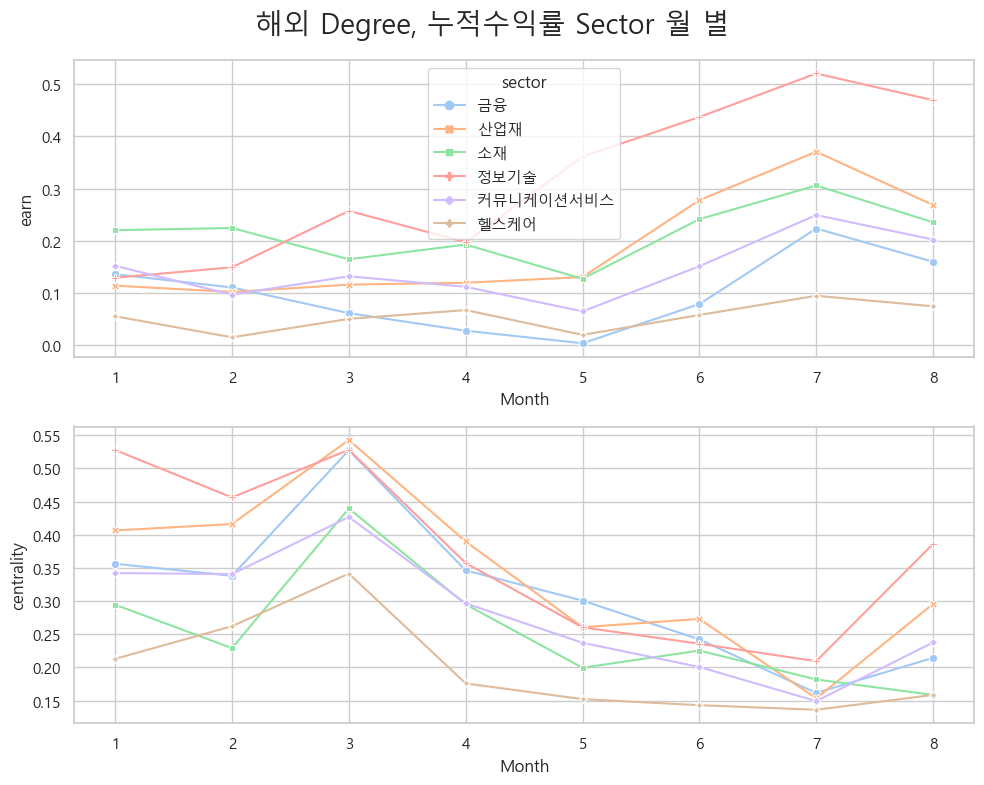

In [18]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')


fig, axes= plt.subplots(nrows = 2, ncols=1, figsize=(10, 8))
fig.suptitle('해외 Degree, 누적수익률 Sector 월 별', size = 20)

sns.lineplot(data=rate_mean, x='Month', y='earn', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[0])


sns.lineplot(data=degree_mean, x='Month', y='centrality', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[1], legend = False)

plt.tight_layout()

# 누적수익률, Closenese Sector 월별 시각화

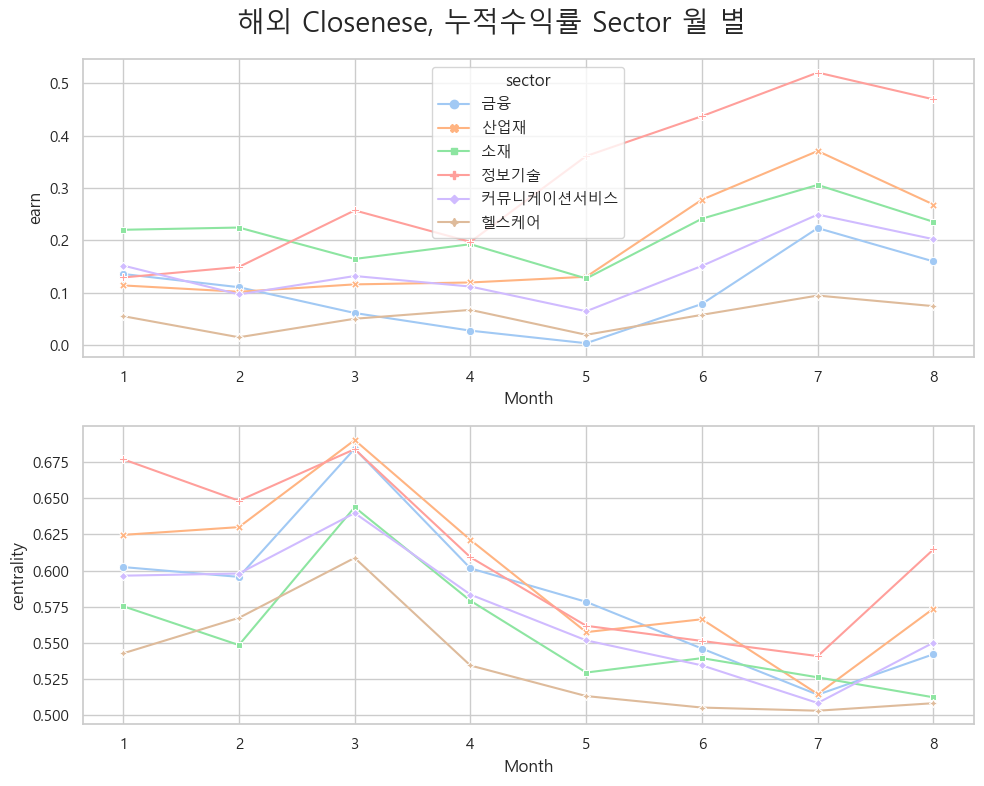

In [19]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')


fig, axes= plt.subplots(nrows = 2, ncols=1, figsize=(10, 8))
fig.suptitle('해외 Closenese, 누적수익률 Sector 월 별', size = 20)

sns.lineplot(data=rate_mean, x='Month', y='earn', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[0])


sns.lineplot(data=close_mean, x='Month', y='centrality', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[1], legend = False)

plt.tight_layout()

# 누적수익률, Beetweennese Sector 월별 시각화

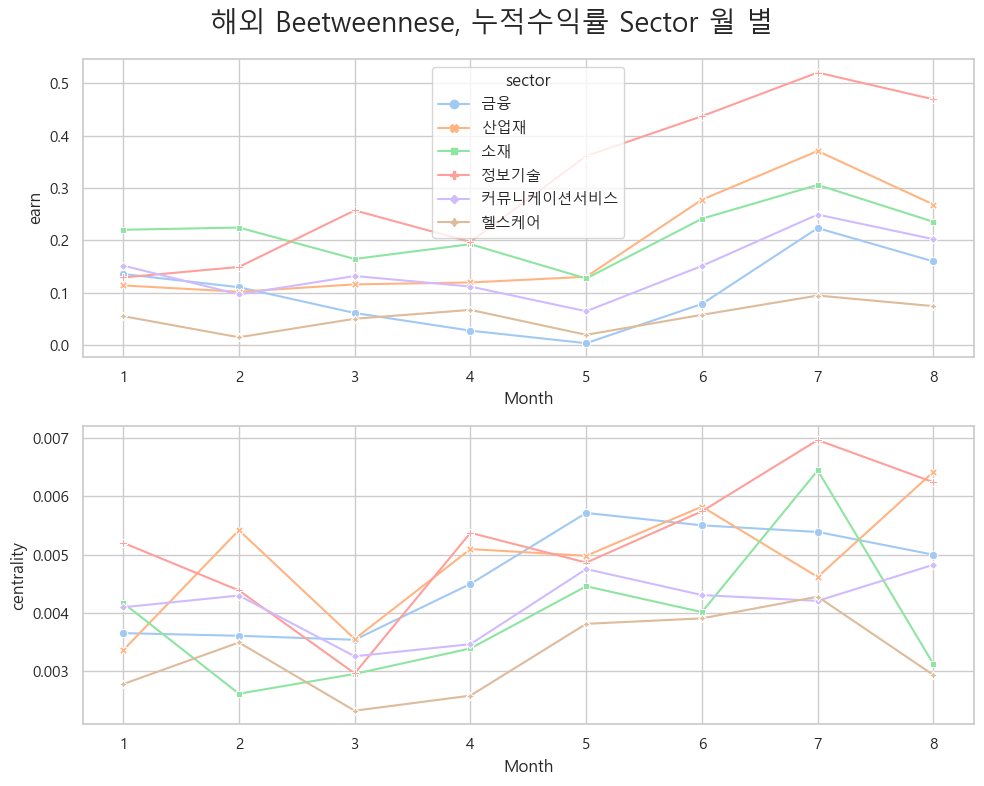

In [20]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')


fig, axes= plt.subplots(nrows = 2, ncols=1, figsize=(10, 8))
fig.suptitle('해외 Beetweennese, 누적수익률 Sector 월 별', size = 20)

sns.lineplot(data=rate_mean, x='Month', y='earn', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[0])


sns.lineplot(data=beet_mean, x='Month', y='centrality', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[1], legend = False)

plt.tight_layout()

# 누적수익률, Eigenvector Sector 월별 시각화

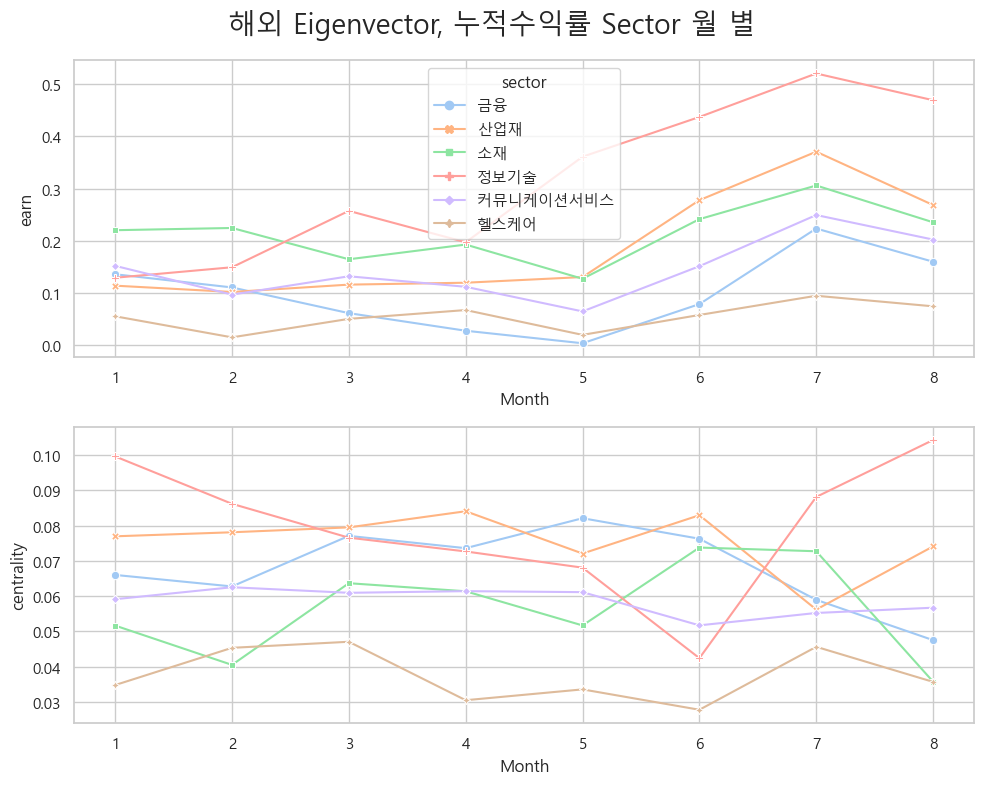

In [21]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')


fig, axes= plt.subplots(nrows = 2, ncols=1, figsize=(10, 8))
fig.suptitle('해외 Eigenvector, 누적수익률 Sector 월 별', size = 20)

sns.lineplot(data=rate_mean, x='Month', y='earn', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[0])


sns.lineplot(data=eigen_mean, x='Month', y='centrality', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[1], legend = False)

plt.tight_layout()

# 누적수익률, Pagerank Sector 월별 시각화

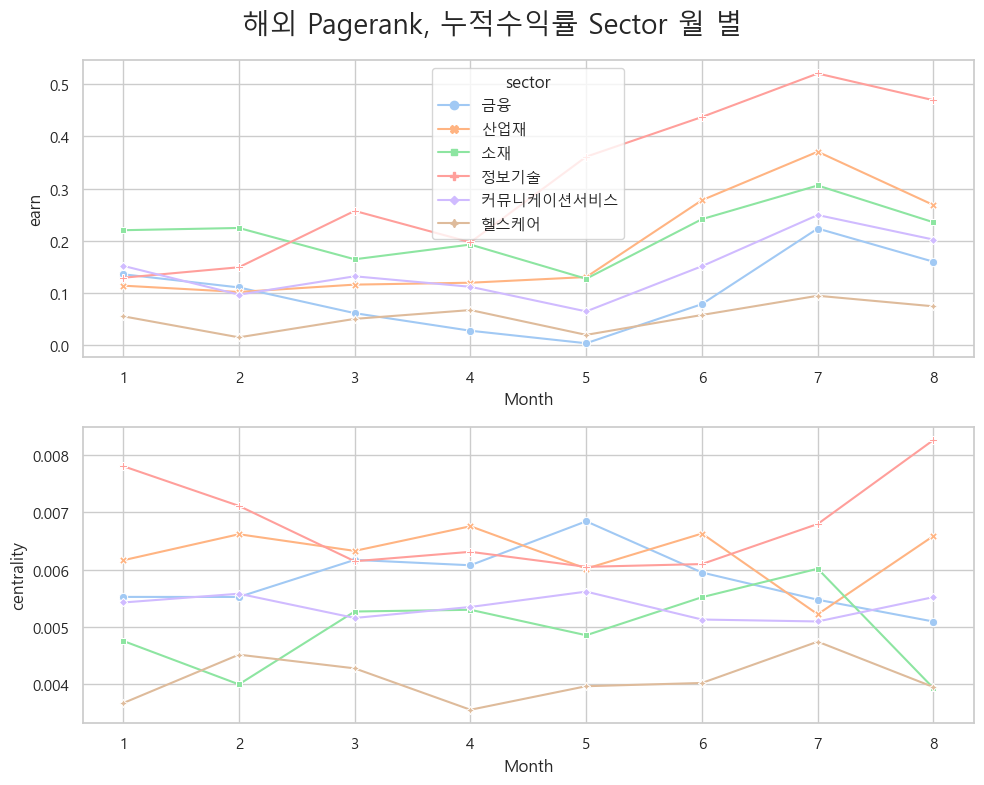

In [22]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')


fig, axes= plt.subplots(nrows = 2, ncols=1, figsize=(10, 8))
fig.suptitle('해외 Pagerank, 누적수익률 Sector 월 별', size = 20)

sns.lineplot(data=rate_mean, x='Month', y='earn', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[0])


sns.lineplot(data=pagerank_mean, x='Month', y='centrality', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[1], legend = False)

plt.tight_layout()